(cov-ind-time-notebook)=
# Covariate indipendenti dal tempo

Nell'ambito degli studi sui modelli di crescita lineare, una questione rilevante è capire in che modo le differenze individuali nelle traiettorie di cambiamento siano influenzate da altre variabili. Il presente capitolo si dedica all'integrazione di covariate invarianti nel tempo in questi modelli di crescita. 

Le covariate invarianti nel tempo sono quelle variabili che rimangono costanti per ogni individuo durante il periodo di studio. Esempi tipici includono il genere, le condizioni sperimentali, lo stato socio-economico, e altri attributi che non subiscono modifiche nel tempo. In termini di modellazione, queste variabili vengono trattate come fattori indipendenti in un modello di regressione multipla, dove l'intercetta e la pendenza del modello di crescita lineare fungono da variabili dipendenti. Le covariate possono assumere vari formati: possono essere continue (es. età), ordinali (es. livelli di istruzione) o categoriche (es. genere).

Includere covariate invarianti nel tempo permette di esplorare come le differenze individuali nella traiettoria di crescita (sia in termini di intercetta che di pendenza) siano associate a queste variabili. Questo approccio offre la possibilità di indagare le ragioni sottostanti le diverse modalità di cambiamento tra gli individui. 

- È importante sottolineare che, pur fornendo insights significativi, i risultati ottenuti da questi modelli non implicano relazioni causali. Questi modelli hanno limitazioni simili a quelle dei modelli di regressione standard in termini di inferenza causale.
- È cruciale considerare il contesto nel quale le covariate invarianti nel tempo sono state raccolte. Se queste provengono da un contesto sperimentale con assegnazione casuale, le inferenze potrebbero essere più robuste. Tuttavia, nel caso di dati osservazionali, è necessario un'attenta considerazione per evitare interpretazioni errate o eccessivamente assertive riguardo la causalità.

In sintesi, l'integrazione di covariate invarianti nel tempo nei modelli di crescita lineare fornisce una visione più dettagliata delle dinamiche individuali e del modo in cui vari fattori possono influenzare le traiettorie di crescita. Questo approccio arricchisce la comprensione dei fenomeni studiati, pur richiedendo un'interpretazione cauta e informata dei risultati ottenuti.

In [1]:
source("../_common.R")
suppressPackageStartupMessages({
    library("DT")
    library("kableExtra")
    library("lme4")
})

Per questo esempio considereremo i dati di prestazione matematica dal data set NLSY-CYA Long Data [si veda {cite:t}`grimm2016growth`]. Iniziamo a leggere i dati.

In [2]:
# set filepath for data file
filepath <- "https://raw.githubusercontent.com/LRI-2/Data/main/GrowthModeling/nlsy_math_long_R.dat"
# read in the text data file using the url() function
dat <- read.table(
  file = url(filepath),
  na.strings = "."
) # indicates the missing data designator
# copy data with new name
nlsy_math_long <- dat

# Add names the columns of the data set
names(nlsy_math_long) <- c(
  "id", "female", "lb_wght",
  "anti_k1", "math", "grade",
  "occ", "age", "men",
  "spring", "anti"
)

# view the first few observations in the data set
head(nlsy_math_long, 10)

,id,female,lb_wght,anti_k1,math,grade,occ,age,men,spring,anti
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,201,1,0,0,38,3,2,111,0,1,0
2,201,1,0,0,55,5,3,135,1,1,0
3,303,1,0,1,26,2,2,121,0,1,2
4,303,1,0,1,33,5,3,145,0,1,2
5,2702,0,0,0,56,2,2,100,NA,1,0
6,2702,0,0,0,58,4,3,125,NA,1,2
7,2702,0,0,0,80,8,4,173,NA,1,2
8,4303,1,0,0,41,3,2,115,0,0,1
9,4303,1,0,0,58,4,3,135,0,1,2


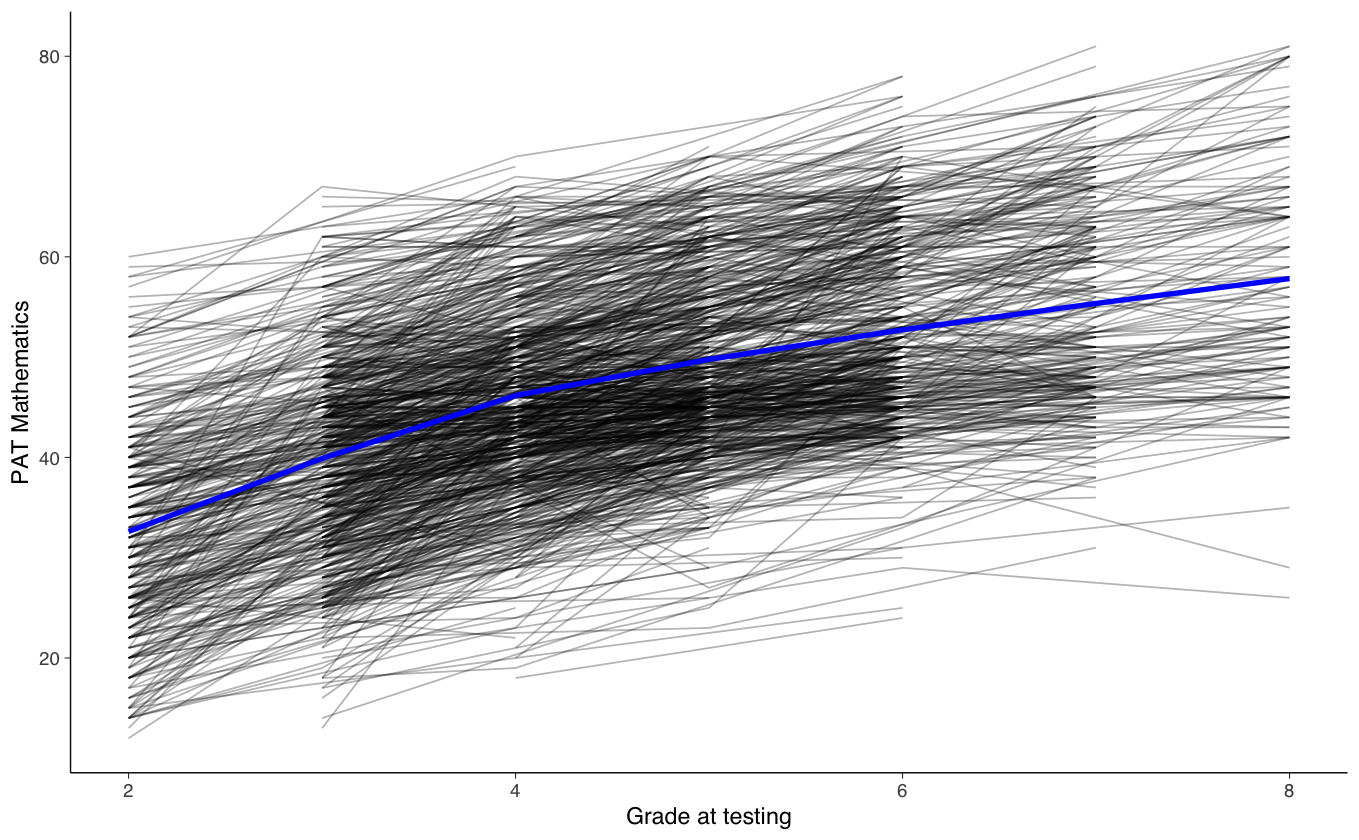

In [3]:
nlsy_math_long |>
  ggplot(
    aes(grade, math, group = id)
  ) +
  geom_line(alpha = 0.3) + # add individual line with transparency
  stat_summary( # add average line
    aes(group = 1),
    fun = mean,
    geom = "line",
    linewidth = 1.5,
    color = "blue"
  ) +
  labs(x = "Grade at testing", y = "PAT Mathematics") 


Per ottenere una visione più dettagliata dei cambiamenti a livello individuale, possiamo selezionare casualmente un campione di 20 individui e registrare, per ciascuno di essi, l'evoluzione dei loro punteggi in matematica nel tempo.

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


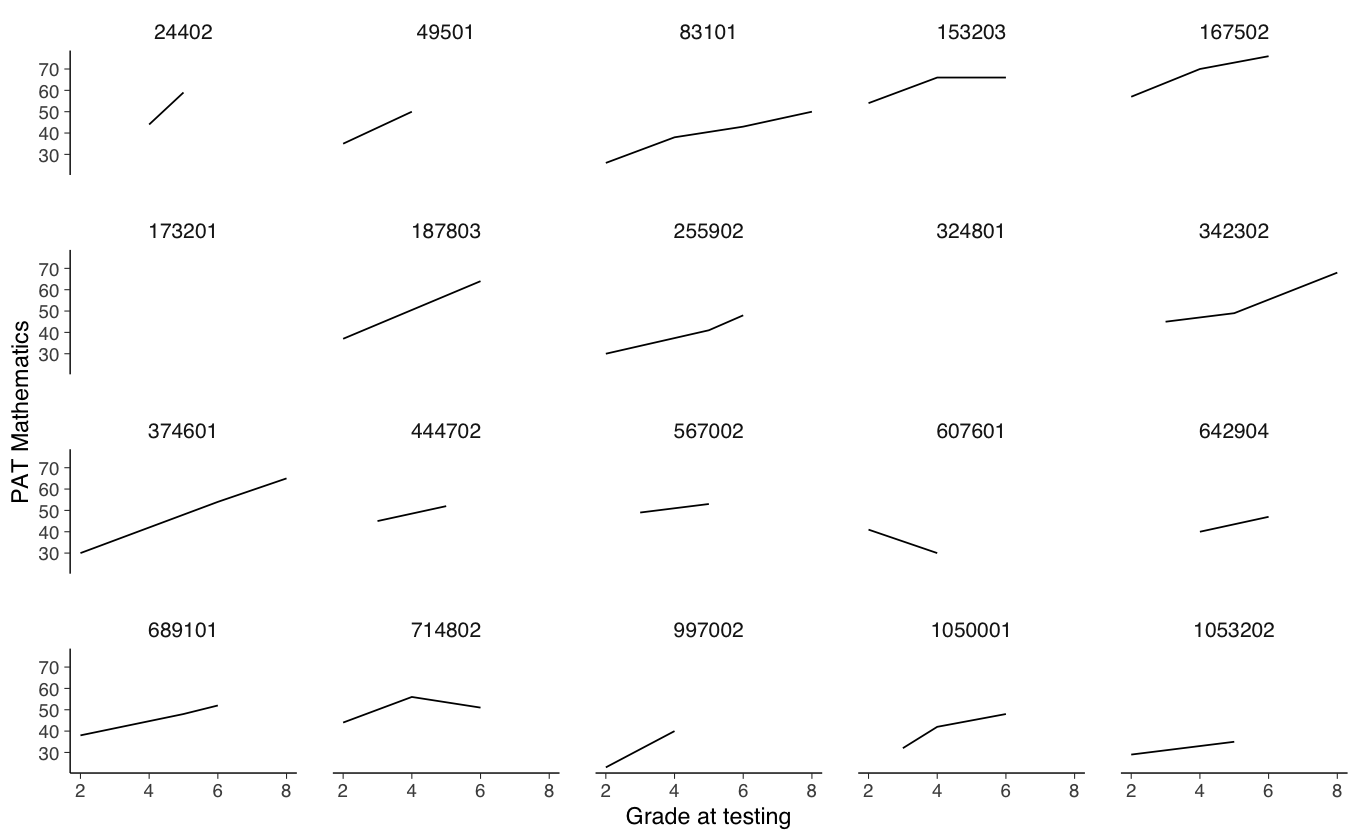

In [4]:
# sample 20 ids
people <- unique(nlsy_math_long$id) %>% sample(20)
# do separate graph for each individual
nlsy_math_long %>% 
  filter(id %in% people) %>%  # filter only sampled cases
  ggplot(aes(grade, math, group = 1)) +
  geom_line() +
  facet_wrap(~id) + # a graph for each individual
  labs(x = "Grade at testing", y = "PAT Mathematics") 

Per semplicità, leggiamo gli stessi dati in formato wide da un file.

In [5]:
# set filepath for data file
filepath <- "https://raw.githubusercontent.com/LRI-2/Data/main/GrowthModeling/nlsy_math_wide_R.dat"
# read in the text data file using the url() function
dat <- read.table(
  file = url(filepath),
  na.strings = "."
) # indicates the missing data designator
# copy data with new name
nlsy_math_wide <- dat

# Give the variable names
names(nlsy_math_wide) <- c(
  "id", "female", "lb_wght", "anti_k1",
  "math2", "math3", "math4", "math5", "math6", "math7", "math8",
  "age2", "age3", "age4", "age5", "age6", "age7", "age8",
  "men2", "men3", "men4", "men5", "men6", "men7", "men8",
  "spring2", "spring3", "spring4", "spring5", "spring6", "spring7", "spring8",
  "anti2", "anti3", "anti4", "anti5", "anti6", "anti7", "anti8"
)


# view the first few observations (and columns) in the data set
head(nlsy_math_wide[, 1:11], 10)

,id,female,lb_wght,anti_k1,math2,math3,math4,math5,math6,math7,math8
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,201,1,0,0,NA,38,NA,55,NA,NA,NA
2,303,1,0,1,26,NA,NA,33,NA,NA,NA
3,2702,0,0,0,56,NA,58,NA,NA,NA,80
4,4303,1,0,0,NA,41,58,NA,NA,NA,NA
5,5002,0,0,4,NA,NA,46,NA,54,NA,66
6,5005,1,0,0,35,NA,50,NA,60,NA,59
7,5701,0,0,2,NA,62,61,NA,NA,NA,NA
8,6102,0,0,0,NA,NA,55,67,NA,81,NA
9,6801,1,0,0,NA,54,NA,62,NA,66,NA


Specifichiamo il modello SEM (si noti che, anche in questo caso, la scrittura del modello può essere semplificata usando la funzione `growth`).

In [6]:
#writing out linear growth model with tic in full SEM way 
lg_math_tic_lavaan_model <- '
    #latent variable definitions
            #intercept
              eta1 =~ 1*math2+
                      1*math3+
                      1*math4+
                      1*math5+
                      1*math6+
                      1*math7+
                      1*math8
            #linear slope
              eta2 =~ 0*math2+
                      1*math3+
                      2*math4+
                      3*math5+
                      4*math6+
                      5*math7+
                      6*math8

          #factor variances
            eta1 ~~ eta1
            eta2 ~~ eta2

          #factor covariance
            eta1 ~~ eta2

          #manifest variances (set equal by naming theta)
            math2 ~~ theta*math2
            math3 ~~ theta*math3
            math4 ~~ theta*math4
            math5 ~~ theta*math5
            math6 ~~ theta*math6
            math7 ~~ theta*math7
            math8 ~~ theta*math8

          #latent means (freely estimated)
            eta1 ~ 1
            eta2 ~ 1

          #manifest means (fixed to zero)
            math2 ~ 0*1
            math3 ~ 0*1
            math4 ~ 0*1
            math5 ~ 0*1
            math6 ~ 0*1
            math7 ~ 0*1
            math8 ~ 0*1

        #Time invariant covaraite
        #regression of time-invariant covariate on intercept and slope factors
            eta1 ~ lb_wght + anti_k1
            eta2 ~ lb_wght + anti_k1

        #variance of TIV covariates
            lb_wght ~~ lb_wght
            anti_k1 ~~ anti_k1

        #covariance of TIV covaraites
            lb_wght ~~ anti_k1

        #means of TIV covariates (freely estimated)
            lb_wght ~ 1
            anti_k1 ~ 1
' #end of model definition

Adattiamo il modello ai dati.

In [7]:
lg_math_tic_lavaan_fit <- sem(lg_math_tic_lavaan_model,
  data = nlsy_math_wide,
  meanstructure = TRUE,
  estimator = "ML",
  missing = "fiml"
)

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate”


Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING:
    due to missing values, some pairwise combinations have less than
    10% coverage; use lavInspect(fit, "coverage") to investigate.”


Warning message in lav_mvnorm_missing_h1_estimate_moments(Y = X[[g]], wt = WT[[g]], :
“lavaan WARNING:
    Maximum number of iterations reached when computing the sample
    moments using EM; use the em.h1.iter.max= argument to increase the
    number of iterations”


Esaminiamo la soluzione ottenuta.

In [8]:
summary(lg_math_tic_lavaan_fit, fit.measures = TRUE) |>
    print()

lavaan 0.6.17 ended normally after 110 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        21
  Number of equality constraints                     6

  Number of observations                           933
  Number of missing patterns                        61

Model Test User Model:
                                                      
  Test statistic                               220.221
  Degrees of freedom                                39
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                               892.616
  Degrees of freedom                                36
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.788
  Tucker-Lewis Index (TLI)                       0.805
                                  

Creiamo un diagramma di percorso.

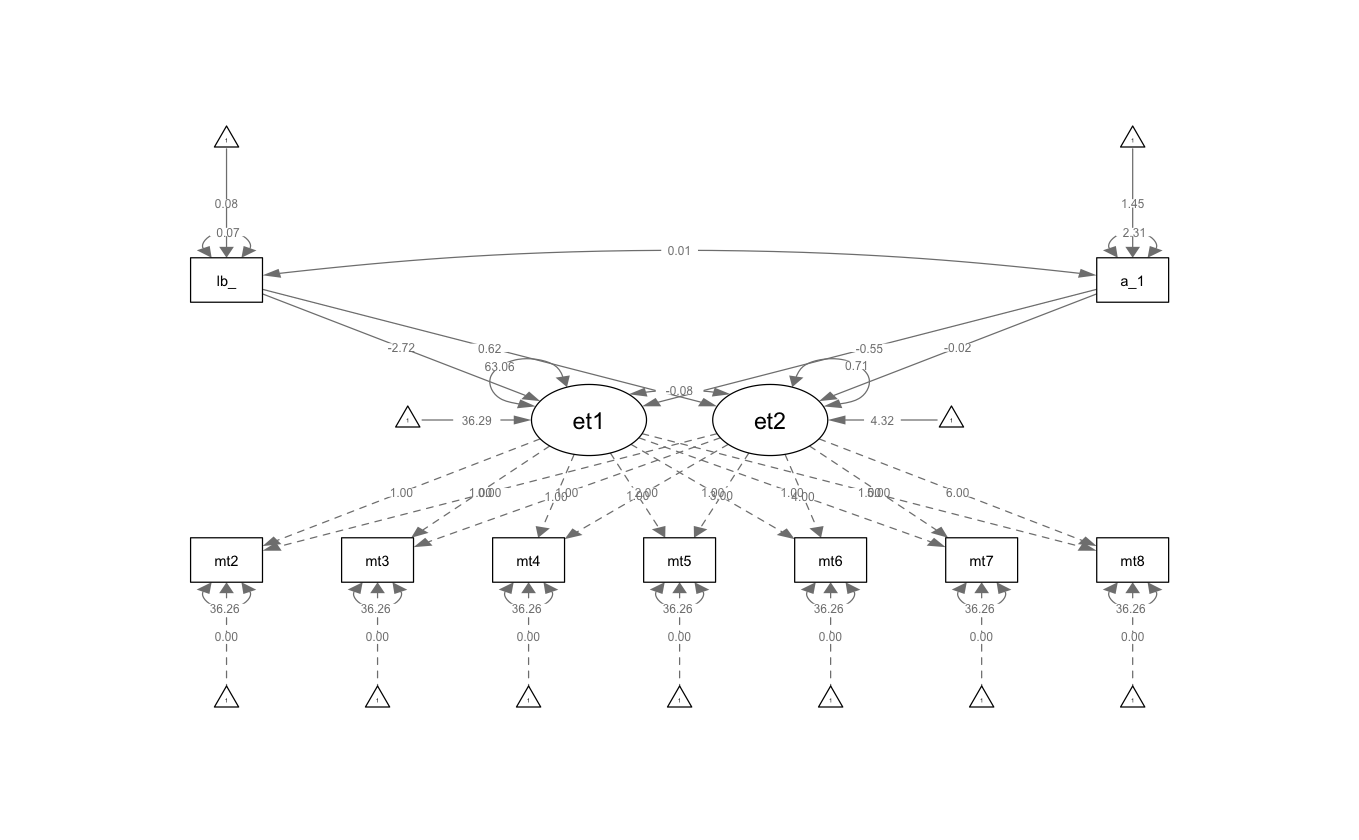

In [9]:
semPaths(lg_math_tic_lavaan_fit, what = "path", whatLabels = "par", style = "ram")

### Valutare il contributo delle covariate

Per valutare se le covariate considerate migliorano l'adattamento del modello, confronteremo il modello precedente con un modello vincolato in cui l'effetto delle covariate viene fissato a zero. 

In [10]:
#writing out linear growth model with tic in full SEM way 
lg_math_ticZERO_lavaan_model <- '
    #latent variable definitions
            #intercept
              eta1 =~ 1*math2+
                      1*math3+
                      1*math4+
                      1*math5+
                      1*math6+
                      1*math7+
                      1*math8
            #linear slope
              eta2 =~ 0*math2+
                      1*math3+
                      2*math4+
                      3*math5+
                      4*math6+
                      5*math7+
                      6*math8

          #factor variances
            eta1 ~~ eta1
            eta2 ~~ eta2

          #factor covariance
            eta1 ~~ eta2

          #manifest variances (set equal by naming theta)
            math2 ~~ theta*math2
            math3 ~~ theta*math3
            math4 ~~ theta*math4
            math5 ~~ theta*math5
            math6 ~~ theta*math6
            math7 ~~ theta*math7
            math8 ~~ theta*math8

          #latent means (freely estimated)
            eta1 ~ 1
            eta2 ~ 1

          #manifest means (fixed to zero)
            math2 ~ 0*1
            math3 ~ 0*1
            math4 ~ 0*1
            math5 ~ 0*1
            math6 ~ 0*1
            math7 ~ 0*1
            math8 ~ 0*1

        #Time invariant covaraite
          #regression of time-invariant covariate on intercept and slope factors
          #FIXED to 0
            eta1 ~ 0*lb_wght + 0*anti_k1
            eta2 ~ 0*lb_wght + 0*anti_k1

        #variance of TIV covariates
            lb_wght ~~ lb_wght
            anti_k1 ~~ anti_k1

        #covariance of TIV covaraites
            lb_wght ~~ anti_k1

        #means of TIV covariates (freely estimated)
            lb_wght ~ 1
            anti_k1 ~ 1
' #end of model definition

Adattiamo il modello ai dati.

In [11]:
lg_math_ticZERO_lavaan_fit <- sem(lg_math_ticZERO_lavaan_model,
  data = nlsy_math_wide,
  meanstructure = TRUE,
  estimator = "ML",
  missing = "fiml"
)

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate”


Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING:
    due to missing values, some pairwise combinations have less than
    10% coverage; use lavInspect(fit, "coverage") to investigate.”


Warning message in lav_mvnorm_missing_h1_estimate_moments(Y = X[[g]], wt = WT[[g]], :
“lavaan WARNING:
    Maximum number of iterations reached when computing the sample
    moments using EM; use the em.h1.iter.max= argument to increase the
    number of iterations”


Esaminiamo il risultato ottenuto. 

In [12]:
summary(lg_math_ticZERO_lavaan_fit, fit.measures = TRUE) |>
    print()

lavaan 0.6.17 ended normally after 85 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        17
  Number of equality constraints                     6

  Number of observations                           933
  Number of missing patterns                        61

Model Test User Model:
                                                      
  Test statistic                               234.467
  Degrees of freedom                                43
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                               892.616
  Degrees of freedom                                36
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.776
  Tucker-Lewis Index (TLI)                       0.813
                                   

Generiamo il diagramma di percorso.

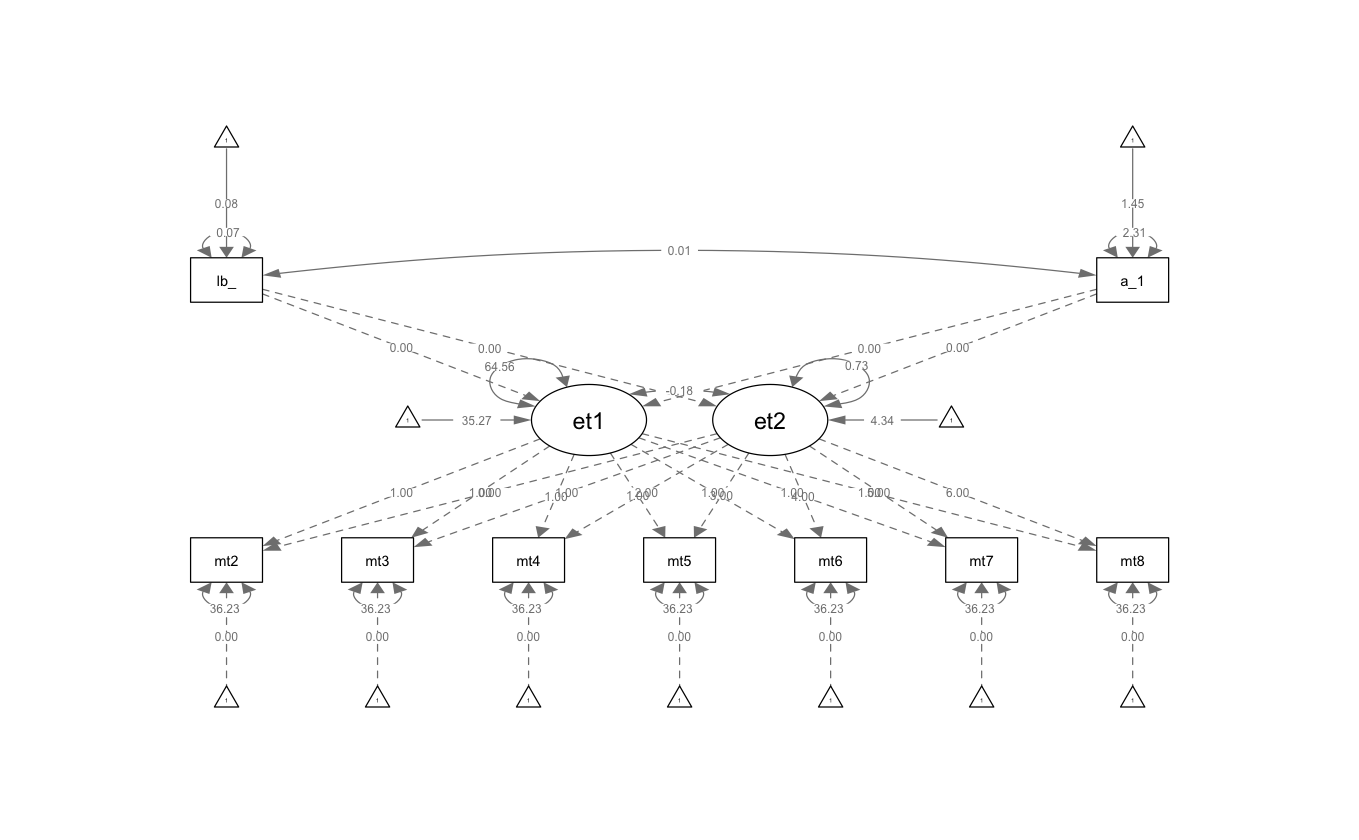

In [13]:
semPaths(lg_math_ticZERO_lavaan_fit, what = "path", whatLabels = "par")

Eseguiamo il confronto tra i due modelli mediante il test del rapporto tra verosimiglianze.

In [14]:
lavTestLRT(lg_math_tic_lavaan_fit, lg_math_ticZERO_lavaan_fit) |>
    print()


Chi-Squared Difference Test

                           Df   AIC   BIC  Chisq Chisq diff    RMSEA Df diff
lg_math_tic_lavaan_fit     39 19600 19673 220.22                            
lg_math_ticZERO_lavaan_fit 43 19606 19660 234.47     14.245 0.052395       4
                           Pr(>Chisq)   
lg_math_tic_lavaan_fit                  
lg_math_ticZERO_lavaan_fit   0.006552 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Il valore-p associato alla statistica chi-quadrato relativa alla differenza tra i due modelli è piccolo. Questo significa che i vincoli aggiuntivi hanno impattato in maniera sostanziale la bontà di adattamento del modello ai dati. Da ciò concludiamo che le covariate forniscono un contributo utile al modello.

## Confronto con il modello misto

Eseguiamo l’analisi utilizzando un modello misto con intercetta e pendenza casuale. Confronteremo un modello ridotto, che include solo l’effetto del tempo, con un modello completo che include le covariate esaminate in precedenza. Il modello completo include gli effetti principali delle covariate e l’interazione tra le covariate e il tempo.

Adattiamo il modello "completo".

In [15]:
nlsy_math_long$grade_c2 <- nlsy_math_long$grade-2

fit2_lmer <- lmer(
    math ~ 1 + grade_c2 + lb_wght + anti_k1 + I(grade_c2 * lb_wght) + I(grade_c2 * anti_k1) +
        (1 + grade_c2 | id),
    data = nlsy_math_long,
    REML = FALSE,
    na.action = na.exclude
)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0057721 (tol = 0.002, component 1)”


Esaminiamo i risultati ottenuti.

In [16]:
summary(fit2_lmer)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: math ~ 1 + grade_c2 + lb_wght + anti_k1 + I(grade_c2 * lb_wght) +  
    I(grade_c2 * anti_k1) + (1 + grade_c2 | id)
   Data: nlsy_math_long

     AIC      BIC   logLik deviance df.resid 
 15943.1  16000.2  -7961.6  15923.1     2211 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.07986 -0.52517 -0.00867  0.53079  2.53455 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 id       (Intercept) 63.0653  7.9414        
          grade_c2     0.7141  0.8451   -0.01
 Residual             36.2543  6.0212        
Number of obs: 2221, groups:  id, 932

Fixed effects:
                      Estimate Std. Error t value
(Intercept)           36.28983    0.49630  73.120
grade_c2               4.31521    0.12060  35.782
lb_wght               -2.71621    1.29359  -2.100
anti_k1               -0.55087    0.23246  -2.370
I(grade_c2 * lb_wght)  0.62463    0.33314   1.875
I(grade_c2 * anti_k1) -0.01930   

Adattiamo un modello misto vincolato senza covariate, utilizzando un modello con intercetta e pendenza casuale.

In [17]:
fit3_lmer <- lmer(
    math ~ 1 + grade_c2 + (1 + grade_c2 | id),
    data = nlsy_math_long,
    REML = FALSE,
    na.action = na.exclude
)

Confrontiamo i due modelli utilizzando il test del rapporto di verosimiglianza.

In [18]:
lavTestLRT(fit2_lmer, fit3_lmer) |>
    print()

ERROR: Error in h(simpleError(msg, call)): errore durante la valutazione dell'argomento 'x' nella selezione di un metodo per la funzione 'print': nessuno slot di nome "Options" per questo oggetto di classe "lmerMod"


Il risultato è sostanzialmente identico a quello ottenuto con il modello LGM.